# Análise de diferença salarial geral comparando UFs (2009 e 2019)
#### Para trabalhadores de CBOs de TI em todos os setores

## Imports, leitura dos dados e tratamentos necessários:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np


# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# Leitura das tabelas principais:
RAIS_GERAL_2009 = pd.read_csv("../../data/raw/DATA_RAIS_GERAL_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)
RAIS_GERAL_2019 = pd.read_csv("../../data/raw/DATA_RAIS_GERAL_2019.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2009.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

RAIS_GERAL_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

## Analise da quantidade de pessoas por raça e sexo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [22]:
# Tabela principal para quantidade em 2009:
RAIS_GERAL_2009_QNT = pd.crosstab(RAIS_GERAL_2009["Raça"].replace(raca_2009), RAIS_GERAL_2009["Sexo"].replace(sexo))
RAIS_GERAL_2009_QNT.insert(1, "% Fem.", RAIS_GERAL_2009_QNT["Fem."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)
RAIS_GERAL_2009_QNT.insert(3, "% Masc.", RAIS_GERAL_2009_QNT["Masc."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)

RAIS_GERAL_2009_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Amarela,2154,33.36,4303,66.64
Branca,52928,21.53,192852,78.47
Indigena,118,19.67,482,80.33
Parda,13597,23.02,45465,76.98
Preta,1522,20.22,6007,79.78


In [23]:
# Tabela principal para quantidade em 2019:
RAIS_GERAL_2019_QNT = pd.crosstab(RAIS_GERAL_2019["Raça"].replace(raca_2019), RAIS_GERAL_2019["Sexo"].replace(sexo))
RAIS_GERAL_2019_QNT.insert(1, "% Fem.", RAIS_GERAL_2019_QNT["Fem."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)
RAIS_GERAL_2019_QNT.insert(3, "% Masc.", RAIS_GERAL_2019_QNT["Masc."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)

RAIS_GERAL_2019_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Amarela,1919,25.79,5523,74.21
Branca,63280,19.84,255724,80.16
Indigena,184,20.13,730,79.87
Parda,22805,18.79,98558,81.21
Preta,3518,19.44,14575,80.56


In [24]:
# Tabela para gráfico da quantidade em 2009:
RAIS_GERAL_2009_QNT.insert(4, "Total", RAIS_GERAL_2009_QNT["% Masc."] + RAIS_GERAL_2009_QNT["% Fem."])
RAIS_GERAL_2009_QNT.insert(5, "Ano", "2009")

# Tabela para gráfico da quantidade em 2019:
RAIS_GERAL_2019_QNT.insert(4, "Total", RAIS_GERAL_2019_QNT["% Masc."] + RAIS_GERAL_2019_QNT["% Fem."])
RAIS_GERAL_2019_QNT.insert(5, "Ano", "2019")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2009_QNT, RAIS_GERAL_2019_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

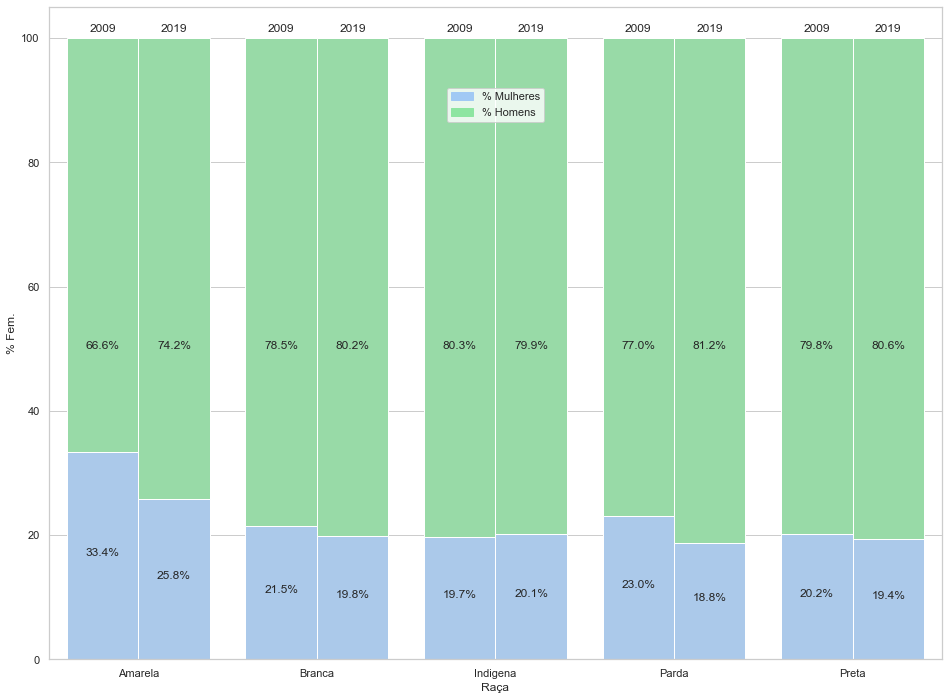

In [26]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize = (16, 12))

# Configuração da grid da imagem:
sns.set(style = "whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x = "Raça", y = "Total", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": pal[2],"2019":pal[2]})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1
    bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"][i]), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x = "Raça", y = "% Fem.", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": pal[0],"2019":pal[0]})

# Captura das barras recém criadas:
patches = bar2.patches[10:]

# Escrita da porcentagem para cada barra capturada das mulheres:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."][i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color = pal[0])
bottom_bar = mpatches.Patch(label='% Homens', color = pal[2])
plt.legend(handles=[top_bar, bottom_bar], loc = 'center', bbox_to_anchor = (.45, .8, .1, .1))

## Análise das massas salariais por raça e sexo:

### Criação das tabelas e tabela de gráfico (não será incluído no relatório final:)

In [29]:
# Tabela principal para massa salarial em 2009:
RAIS_GERAL_2009_MASSA = pd.crosstab(RAIS_GERAL_2009["Raça"].replace(raca_2009), RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'sum')
RAIS_GERAL_2009_MASSA.insert(1, "% Fem.", RAIS_GERAL_2009_MASSA["Fem."] / (RAIS_GERAL_2009_MASSA["Fem."] + RAIS_GERAL_2009_MASSA["Masc."]) * 100)
RAIS_GERAL_2009_MASSA.insert(3, "% Masc.", RAIS_GERAL_2009_MASSA["Masc."] / (RAIS_GERAL_2009_MASSA["Fem."] + RAIS_GERAL_2009_MASSA["Masc."]) * 100)

RAIS_GERAL_2009_MASSA.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Amarela,"11,706,498.84",33.48,"23,262,592.77",66.52
Branca,"203,696,620.57",21.11,"761,007,890.24",78.89
Indigena,"347,524.41",20.46,"1,351,296.53",79.54
Parda,"30,145,489.73",19.79,"122,181,707.63",80.21
Preta,"3,440,974.91",17.15,"16,626,736.65",82.85


In [30]:
# Tabela principal para massa salarial em 2009:
RAIS_GERAL_2019_MASSA = pd.crosstab(RAIS_GERAL_2019["Raça"].replace(raca_2009), RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'sum')
RAIS_GERAL_2019_MASSA.insert(1, "% Fem.", RAIS_GERAL_2019_MASSA["Fem."] / (RAIS_GERAL_2019_MASSA["Fem."] + RAIS_GERAL_2019_MASSA["Masc."]) * 100)
RAIS_GERAL_2019_MASSA.insert(3, "% Masc.", RAIS_GERAL_2019_MASSA["Masc."] / (RAIS_GERAL_2019_MASSA["Fem."] + RAIS_GERAL_2019_MASSA["Masc."]) * 100)

RAIS_GERAL_2019_MASSA.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
1,"293,883.73",13.24,"1,926,188.94",86.76
2,"53,367,992.73",8.54,"571,405,291.23",91.46
4,"4,072,047.87",10.53,"34,613,223.69",89.47
6,"719,210.78",4.33,"15,908,443.20",95.67
8,"31,854,637.66",11.82,"237,559,289.98",88.18


In [31]:
# Tabela para gráfico da massa salarial em 2009:
RAIS_GERAL_2009_MASSA.insert(4, "Total", RAIS_GERAL_2009_MASSA["% Masc."] + RAIS_GERAL_2009_MASSA["% Fem."])
RAIS_GERAL_2009_MASSA.insert(5, "Ano", "2009")

# Tabela para gráfico da massa salarial em 2019:
RAIS_GERAL_2019_MASSA.insert(4, "Total", RAIS_GERAL_2019_MASSA["% Masc."] + RAIS_GERAL_2019_MASSA["% Fem."])
RAIS_GERAL_2019_MASSA.insert(5, "Ano", "2019")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_MASSA_GRAF = pd.concat([RAIS_GERAL_2009_MASSA, RAIS_GERAL_2019_MASSA]).reset_index()

### Criação do gráfico com os dados referentes a massa salarial:

KeyError: 10

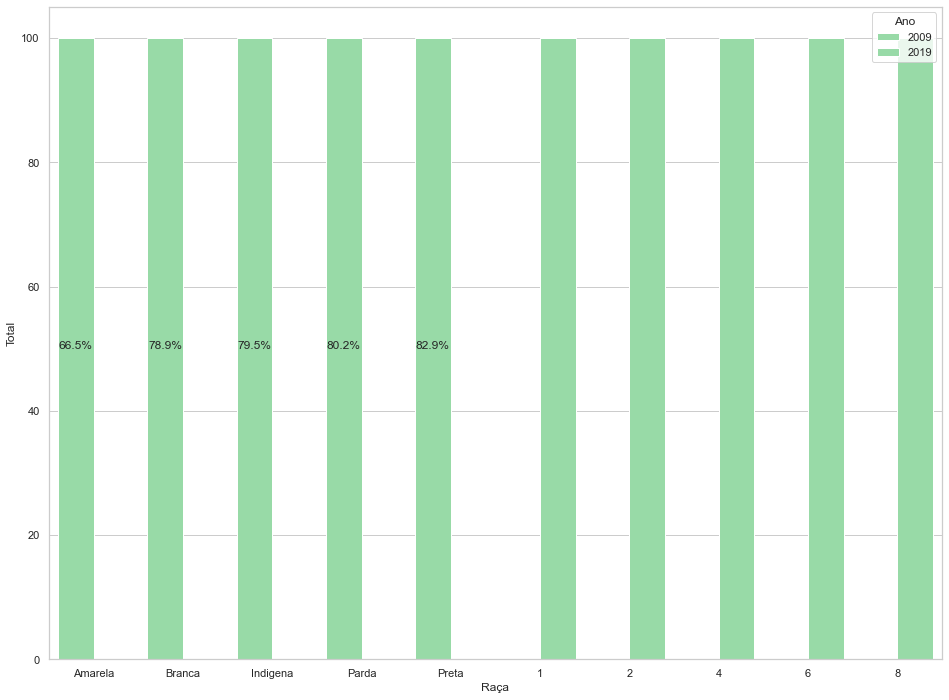

In [32]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize = (16, 12))

# Configuração da grid da imagem:
sns.set(style = "whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x = "Raça", y = "Total", hue = "Ano", data = RAIS_GERAL_MASSA_GRAF, palette = {"2009": pal[2],"2019":pal[2]})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem das massas salariais dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_MASSA_GRAF["% Masc."][i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1
    bar1.annotate('{}'.format(RAIS_GERAL_MASSA_GRAF["Ano"][i]), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x = "Raça", y = "% Fem.", hue = "Ano", data = RAIS_GERAL_MASSA_GRAF, palette = {"2009": pal[0],"2019":pal[0]})

# Captura das barras recém criadas:
patches = bar2.patches[10:]

# Escrita da porcentagem para cada barra capturada das mulheres:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar2.annotate('{:.1f}%'.format(RAIS_GERAL_MASSA_GRAF["% Fem."][i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color = pal[0])
bottom_bar = mpatches.Patch(label='% Homens', color = pal[2])
plt.legend(handles=[top_bar, bottom_bar], loc = 'center', bbox_to_anchor = (.45, .8, .1, .1))

## Análise das médias salariais e diferenças:

### Distribuição da remuneração para cada sexo cruzado pela raça:

<AxesSubplot:xlabel='Remuneração', ylabel='Raça'>

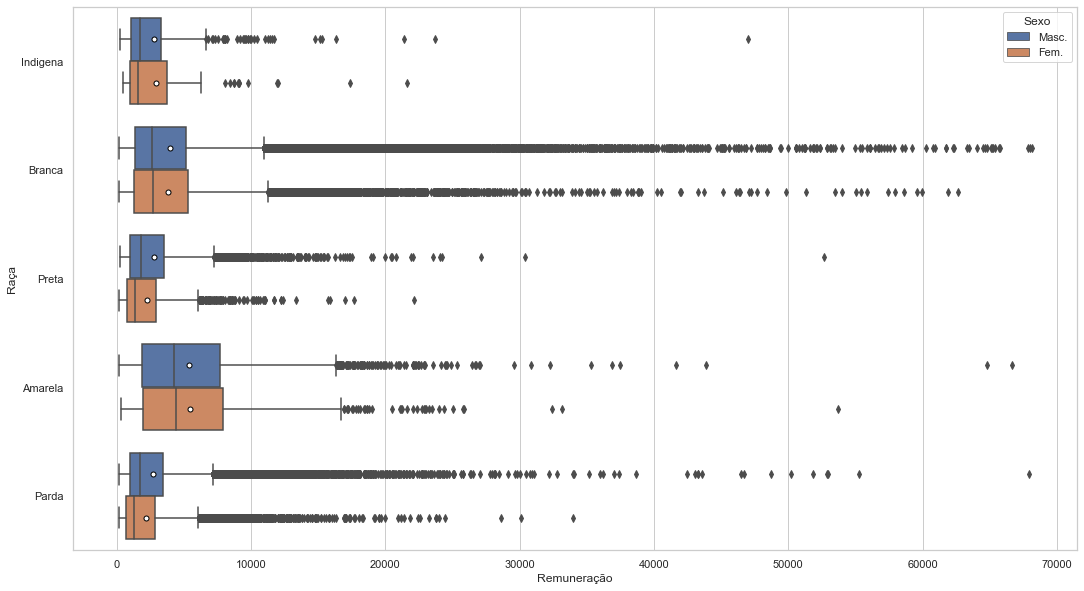

In [33]:
RAIS_GERAL_2009_BOX = RAIS_GERAL_2009
RAIS_GERAL_2009_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2009_BOX["Raça"].replace(raca_2009, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2009, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, order = raca_2009.values())
box.figure.set_size_inches(18, 10)
box

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [34]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIA = pd.crosstab(RAIS_GERAL_2009["Raça"].replace(raca_2009), RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2009_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIA["Fem."] - RAIS_GERAL_2009_MEDIA["Masc."]) / RAIS_GERAL_2009_MEDIA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"5,434.77","5,406.13",0.53
Branca,"3,848.56","3,946.07",-2.47
Indigena,"2,945.12","2,803.52",5.05
Parda,"2,217.07","2,687.38",-17.50
Preta,"2,260.82","2,767.89",-18.32


In [35]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIA = pd.crosstab(RAIS_GERAL_2019["Raça"].replace(raca_2019), RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2019_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIA["Fem."] - RAIS_GERAL_2019_MEDIA["Masc."]) / RAIS_GERAL_2019_MEDIA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"9,776.45","9,655.10",1.26
Branca,"6,574.93","7,249.67",-9.31
Indigena,"6,063.43","6,769.41",-10.43
Parda,"4,412.14","5,245.00",-15.88
Preta,"4,355.74","5,141.34",-15.28


In [36]:
RAIS_GERAL_2009_MEDIA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIA.insert(3, "Ano", "2019")

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIA, RAIS_GERAL_2019_MEDIA]).reset_index()

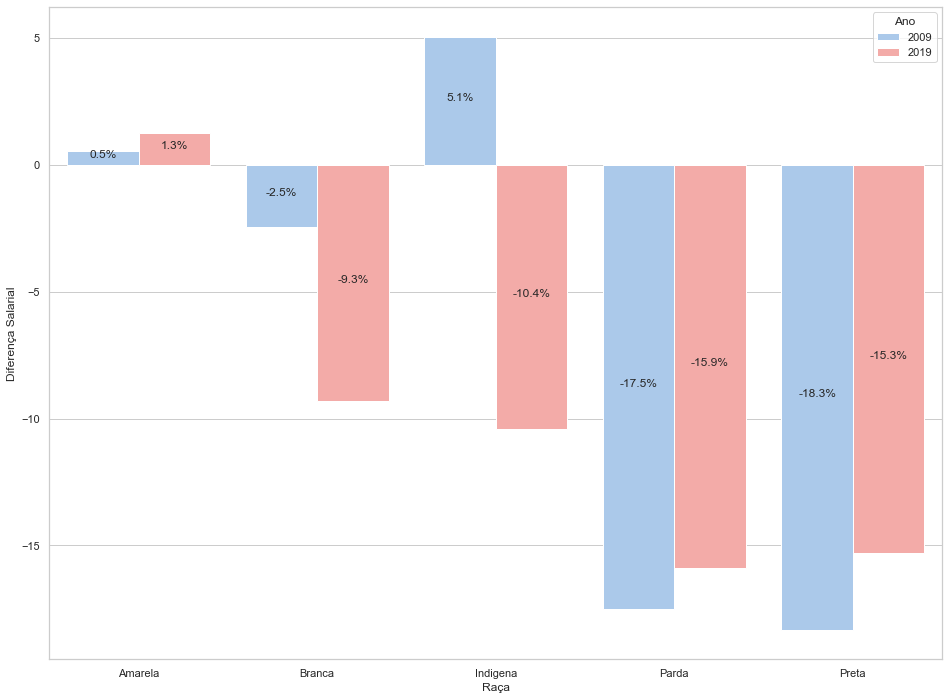

In [37]:
# Criação do gráfico inicial:
plt.figure(figsize = (16, 12))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da paleta de cores a serem utilizadas:
pal = sns.color_palette("pastel")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Raça", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2009": pal[0],"2019":pal[3]})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')


### Teste de hipótese para cada grupo de médias por CBOs:

In [155]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Médias estatisticamente diferentes'
    else:
        return stat, p_valor, 'Médias estatisticamente iguais'

In [188]:
TESTE_HIP_2009 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2009.query("Sexo == 1").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2009.query("Sexo == 2").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    mean1 = df1.mean()
    mean2 = df2.mean()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2009.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2009_MEDIA, TESTE_HIP_2009, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
CBO,,,,,
1236 - Diretoria,"6,303.76","9,291.63",184488.5,0.01 > 0.00000...,Médias estatisticamente diferentes
1425 - Gerência,"7,260.19","7,631.70",27938756.0,0.01 > 0.00384...,Médias estatisticamente diferentes
2122 - Engenharia,"5,684.98","7,101.32",467634.5,0.01 > 0.00000...,Médias estatisticamente diferentes
2123 - Analistas,"3,448.46","3,847.81",16365404.0,0.01 > 0.00000...,Médias estatisticamente diferentes
2124 - Técnicos,"4,685.91","4,420.62",3178232492.5,0.01 > 0.00000...,Médias estatisticamente diferentes
3171 - Suporte,"1,729.24","2,371.62",734007545.0,0.01 > 0.00000...,Médias estatisticamente diferentes
3172 - Administradores,"1,434.72","1,695.89",380332191.5,0.01 > 0.00000...,Médias estatisticamente diferentes


In [189]:
TESTE_HIP_2019 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2019.query("Sexo == 1").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2019.query("Sexo == 2").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    mean1 = df1.mean()
    mean2 = df2.mean()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2019.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2019_HIP = pd.merge(RAIS_GERAL_2019_MEDIA, TESTE_HIP_2019, left_index=True, right_index=True)
RAIS_GERAL_2019_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2019_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
CBO,,,,,
1236 - Diretoria,"3,633.38","6,506.15",166431.0,0.01 > 0.00000...,Médias estatisticamente diferentes
1425 - Gerência,"4,629.81","7,252.72",15088163.0,0.01 > 0.00000...,Médias estatisticamente diferentes
2122 - Engenharia,"4,475.18","7,975.56",346939.5,0.01 > 0.00000...,Médias estatisticamente diferentes
2123 - Analistas,"4,648.71","6,845.34",10927516.5,0.01 > 0.00000...,Médias estatisticamente diferentes
2124 - Técnicos,"5,174.56","7,016.37",1746116825.0,0.01 > 0.00000...,Médias estatisticamente diferentes
3171 - Suporte,"4,422.36","5,068.79",535973293.5,0.01 > 0.00000...,Médias estatisticamente diferentes
3172 - Administradores,"3,957.92","5,783.96",232010992.5,0.01 > 0.00000...,Médias estatisticamente diferentes
